In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [24]:
# Đọc dữ liệu
df_HN = pd.read_csv('AQI_HaNoi_Done.csv')
df_DN = pd.read_csv('AQI_DaNang_Done.csv')
df_VT = pd.read_csv('AQI_VietTri_Done1.csv')

df_HN = df_HN.reset_index()['AQI']
df_DN = df_DN.reset_index()['AQI']
df_VT = df_VT.reset_index()['AQI']

In [25]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df_HN=scaler.fit_transform(np.array(df_HN).reshape(-1,1))
df_DN=scaler.fit_transform(np.array(df_DN).reshape(-1,1))
df_VT=scaler.fit_transform(np.array(df_VT).reshape(-1,1))

In [26]:
# Chia dữ liệu train, test theo tỉ lệ 6:4

# Hà Nội
train_size_HN = int(0.6 * len(df_HN))
test_size_HN = len(df_HN) - train_size_HN

train_data_HN = df_HN[:train_size_HN]
test_data_HN = df_HN[train_size_HN:train_size_HN+test_size_HN]

# Đà Nẵng
train_size_DN = int(0.6 * len(df_DN))
test_size_DN = len(df_DN) - train_size_DN

train_data_DN = df_DN[:train_size_DN]
test_data_DN = df_DN[train_size_DN:train_size_DN+test_size_DN]

#Việt Trì
train_size_VT = int(0.6 * len(df_VT))
test_size_VT = len(df_VT) - train_size_VT

train_data_VT = df_VT[:train_size_VT]
test_data_VT = df_VT[train_size_VT:train_size_VT+test_size_VT]

In [27]:
# Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=100):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [28]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train_HN, y_train_HN = create_dataset(train_data_HN, time_step)
X_test_HN, y_test_HN = create_dataset(test_data_HN, time_step)

X_train_DN, y_train_DN = create_dataset(train_data_DN, time_step)
X_test_DN, y_test_DN = create_dataset(test_data_DN, time_step)

X_train_VT, y_train_VT = create_dataset(train_data_VT, time_step)
X_test_VT, y_test_VT = create_dataset(test_data_VT, time_step)

In [29]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train_HN = X_train_HN.reshape(X_train_HN.shape[0],X_train_HN.shape[1] , 1)
X_test_HN = X_test_HN.reshape(X_test_HN.shape[0],X_test_HN.shape[1] , 1)

X_train_DN = X_train_DN.reshape(X_train_DN.shape[0],X_train_DN.shape[1] , 1)
X_test_DN = X_test_DN.reshape(X_test_DN.shape[0],X_test_DN.shape[1] , 1)

X_train_VT = X_train_VT.reshape(X_train_VT.shape[0],X_train_VT.shape[1] , 1)
X_test_VT = X_test_VT.reshape(X_test_VT.shape[0],X_test_VT.shape[1] , 1)

In [30]:
# Define LSTM Model

model_HN = Sequential()
model_HN.add(SimpleRNN(50, input_shape=(time_step, 1)))
model_HN.add(Dense(1))
model_HN.compile(loss='mean_squared_error',optimizer='adam')

model_DN = Sequential()
model_DN.add(SimpleRNN(50, input_shape=(time_step, 1)))
model_DN.add(Dense(1))
model_DN.compile(loss='mean_squared_error',optimizer='adam')

model_VT = Sequential()
model_VT.add(SimpleRNN(50, input_shape=(time_step, 1)))
model_VT.add(Dense(1))
model_VT.compile(loss='mean_squared_error',optimizer='adam')

In [31]:
# Fit mô hình với dữ liệu train
model_HN.fit(X_train_HN,y_train_HN,validation_data=(X_test_HN,y_test_HN),epochs=100,batch_size=64,verbose=1)
model_DN.fit(X_train_DN,y_train_DN,validation_data=(X_test_DN,y_test_DN),epochs=100,batch_size=64,verbose=1)
model_VT.fit(X_train_VT,y_train_VT,validation_data=(X_test_VT,y_test_VT),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 2s 39ms/step - loss: 0.0813 - val_loss: 0.0224
Epoch 2/100
17/17 [==============================] - 0s 26ms/step - loss: 0.0255 - val_loss: 0.0208
Epoch 3/100
17/17 [==============================] - 0s 26ms/step - loss: 0.0221 - val_loss: 0.0187
Epoch 4/100
17/17 [==============================] - 0s 30ms/step - loss: 0.0199 - val_loss: 0.0192
Epoch 5/100
17/17 [==============================] - 0s 26ms/step - loss: 0.0196 - val_loss: 0.0168
Epoch 6/100
17/17 [==============================] - 1s 36ms/step - loss: 0.0185 - val_loss: 0.0197
Epoch 7/100
17/17 [==============================] - 1s 47ms/step - loss: 0.0175 - val_loss: 0.0159
Epoch 8/100
17/17 [==============================] - 1s 46ms/step - loss: 0.0172 - val_loss: 0.0160
Epoch 9/100
17/17 [==============================] - 1s 44ms/step - loss: 0.0164 - val_loss: 0.0164
Epoch 10/100
17/17 [==============================] - 1s 46ms/step - loss: 0.0168 - val_loss: 0.0147

In [32]:
# 10. Dự báo dữ liệu test
y_pred_HN=model_HN.predict(X_test_HN)
y_pred_DN=model_DN.predict(X_test_DN)
y_pred_VT=model_VT.predict(X_test_VT)

21/21 [==============================] - 0s 7ms/step


In [33]:
# Chuẩn hóa dữ liệu y_pred
y_pred_HN=scaler.inverse_transform(y_pred_HN)
y_pred_DN=scaler.inverse_transform(y_pred_DN)
y_pred_VT=scaler.inverse_transform(y_pred_VT)

In [34]:
# Dự báo 30 ngày tiếp theo

x_input_HN = test_data_HN[654:].reshape(1, -1)
x_input_DN = test_data_DN[655:].reshape(1, -1)
x_input_VT = test_data_VT[655:].reshape(1, -1)

temp_input_HN = list(x_input_HN[0])
temp_input_DN = list(x_input_DN[0])
temp_input_VT = list(x_input_VT[0])

lst_output_HN = []
lst_output_DN = []
lst_output_VT = []

n_steps = 100
i = 0

while i < 30:
    # Forecast for HN
    if len(temp_input_HN) > 100:
        x_input_HN = np.array(temp_input_HN[1:])
        x_input_HN = x_input_HN.reshape(1, -1)
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        temp_input_HN = temp_input_HN[1:]
        lst_output_HN.extend(yhat_HN.tolist())

    else:
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        lst_output_HN.extend(yhat_HN.tolist())

    # Forecast for DN
    if len(temp_input_DN) > 100:
        x_input_DN = np.array(temp_input_DN[1:])
        x_input_DN = x_input_DN.reshape(1, -1)
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        temp_input_DN = temp_input_DN[1:]
        lst_output_DN.extend(yhat_DN.tolist())

    else:
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        lst_output_DN.extend(yhat_DN.tolist())

    # Forecast for VT
    if len(temp_input_VT) > 100:
        x_input_VT = np.array(temp_input_VT[1:])
        x_input_VT = x_input_VT.reshape(1, -1)
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        temp_input_VT = temp_input_VT[1:]
        lst_output_VT.extend(yhat_VT.tolist())

    else:
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        lst_output_VT.extend(yhat_VT.tolist())

    i += 1

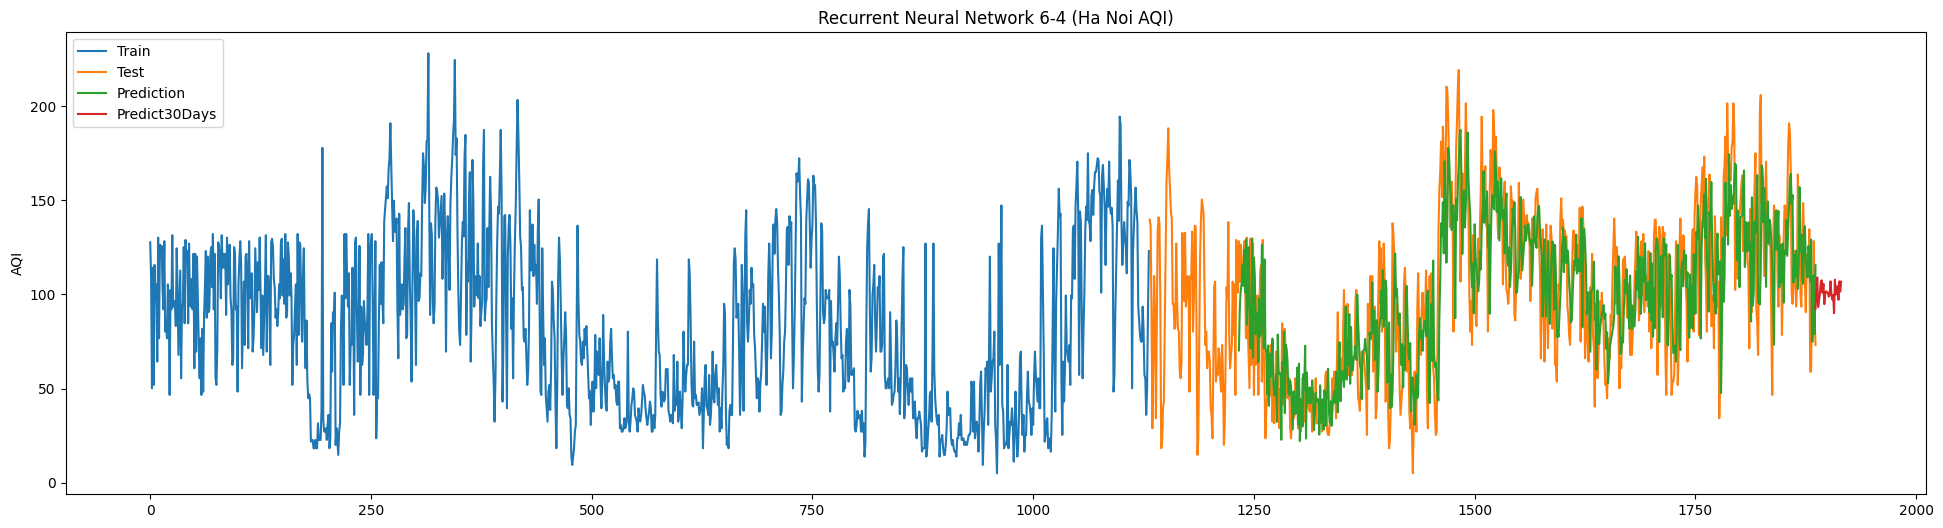

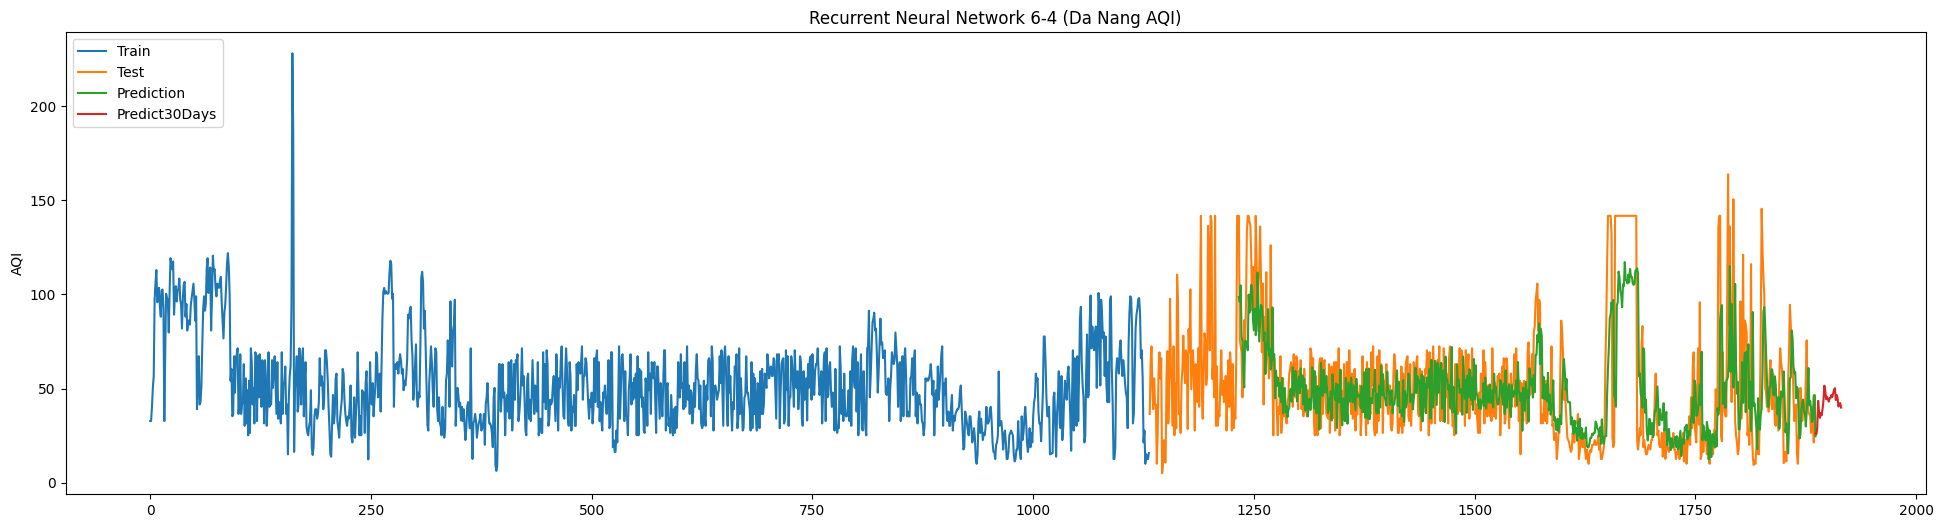

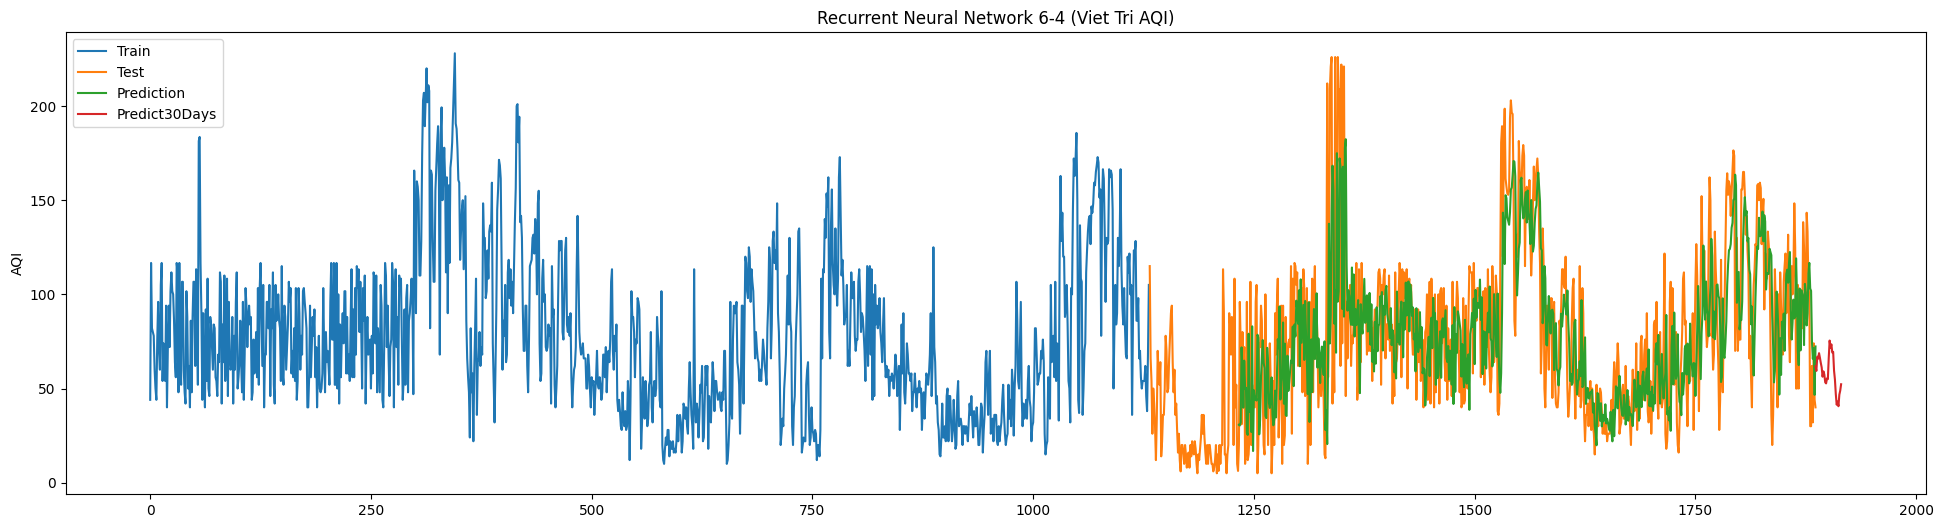

In [40]:
# Vẽ hình
plt.figure(figsize=(24, 6))
train_data_index_HN = pd.RangeIndex(start=0, stop=train_size_HN, step=1)
plt.plot(scaler.inverse_transform(train_data_HN))
test_data_index_HN = pd.RangeIndex(start=train_size_HN, stop=train_size_HN+test_size_HN, step=1)
plt.plot(test_data_index_HN,scaler.inverse_transform(test_data_HN))
test_data_index_HN = pd.RangeIndex(start=train_size_HN+101, stop=train_size_HN+test_size_HN, step=1)
plt.plot(test_data_index_HN,(y_pred_HN))
predict_data_index_HN = pd.RangeIndex(start=len(df_HN)-1, stop=len(df_HN)+29, step=1)
plt.plot(predict_data_index_HN,scaler.inverse_transform(lst_output_HN))
plt.title('Recurrent Neural Network 6-4 (Ha Noi AQI)')
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict30Days'], loc='upper left')
plt.show()

plt.figure(figsize=(24, 6))
train_data_index_DN = pd.RangeIndex(start=0, stop=train_size_DN, step=1)
plt.plot(scaler.inverse_transform(train_data_DN))
test_data_index_DN = pd.RangeIndex(start=train_size_DN, stop=train_size_DN+test_size_DN, step=1)
plt.plot(test_data_index_DN,scaler.inverse_transform(test_data_DN))
test_data_index_DN = pd.RangeIndex(start=train_size_DN+101, stop=train_size_DN+test_size_DN, step=1)
plt.plot(test_data_index_DN,(y_pred_DN))
predict_data_index_DN = pd.RangeIndex(start=len(df_DN)-1, stop=len(df_DN)+29, step=1)
plt.plot(predict_data_index_DN,scaler.inverse_transform(lst_output_DN))
plt.title('Recurrent Neural Network 6-4 (Da Nang AQI)')
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict30Days'], loc='upper left')
plt.show()

plt.figure(figsize=(24, 6))
train_data_index_VT = pd.RangeIndex(start=0, stop=train_size_VT, step=1)
plt.plot(scaler.inverse_transform(train_data_VT))
test_data_index_VT = pd.RangeIndex(start=train_size_VT, stop=train_size_VT+test_size_VT, step=1)
plt.plot(test_data_index_VT,scaler.inverse_transform(test_data_VT))
test_data_index_VT = pd.RangeIndex(start=train_size_VT+101, stop=train_size_VT+test_size_VT, step=1)
plt.plot(test_data_index_VT,(y_pred_VT))
predict_data_index_VT = pd.RangeIndex(start=len(df_VT)-1, stop=len(df_VT)+29, step=1)
plt.plot(predict_data_index_VT,scaler.inverse_transform(lst_output_VT))
plt.title('Recurrent Neural Network 6-4 (Viet Tri AQI)')
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict30Days'], loc='upper left')
plt.show()

In [41]:
# Chia dữ liệu train, test theo tỉ lệ 7:3

# Hà Nội
train_size_HN = int(0.7 * len(df_HN))
test_size_HN = len(df_HN) - train_size_HN

train_data_HN = df_HN[:train_size_HN]
test_data_HN = df_HN[train_size_HN:train_size_HN+test_size_HN]

# Đà Nẵng
train_size_DN = int(0.7 * len(df_DN))
test_size_DN = len(df_DN) - train_size_DN

train_data_DN = df_DN[:train_size_DN]
test_data_DN = df_DN[train_size_DN:train_size_DN+test_size_DN]

#Việt Trì
train_size_VT = int(0.7 * len(df_VT))
test_size_VT = len(df_VT) - train_size_VT

train_data_VT = df_VT[:train_size_VT]
test_data_VT = df_VT[train_size_VT:train_size_VT+test_size_VT]

In [42]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train_HN, y_train_HN = create_dataset(train_data_HN, time_step)
X_test_HN, y_test_HN = create_dataset(test_data_HN, time_step)

X_train_DN, y_train_DN = create_dataset(train_data_DN, time_step)
X_test_DN, y_test_DN = create_dataset(test_data_DN, time_step)

X_train_VT, y_train_VT = create_dataset(train_data_VT, time_step)
X_test_VT, y_test_VT = create_dataset(test_data_VT, time_step)

In [43]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train_HN = X_train_HN.reshape(X_train_HN.shape[0],X_train_HN.shape[1] , 1)
X_test_HN = X_test_HN.reshape(X_test_HN.shape[0],X_test_HN.shape[1] , 1)

X_train_DN = X_train_DN.reshape(X_train_DN.shape[0],X_train_DN.shape[1] , 1)
X_test_DN = X_test_DN.reshape(X_test_DN.shape[0],X_test_DN.shape[1] , 1)

X_train_VT = X_train_VT.reshape(X_train_VT.shape[0],X_train_VT.shape[1] , 1)
X_test_VT = X_test_VT.reshape(X_test_VT.shape[0],X_test_VT.shape[1] , 1)

In [44]:
# Define LSTM Model

model_HN = Sequential()
model_HN.add(SimpleRNN(50, input_shape=(time_step, 1)))
model_HN.add(Dense(1))
model_HN.compile(loss='mean_squared_error',optimizer='adam')

model_DN = Sequential()
model_DN.add(SimpleRNN(50, input_shape=(time_step, 1)))
model_DN.add(Dense(1))
model_DN.compile(loss='mean_squared_error',optimizer='adam')

model_VT = Sequential()
model_VT.add(SimpleRNN(50, input_shape=(time_step, 1)))
model_VT.add(Dense(1))
model_VT.compile(loss='mean_squared_error',optimizer='adam')

In [45]:
# Fit mô hình với dữ liệu train
model_HN.fit(X_train_HN,y_train_HN,validation_data=(X_test_HN,y_test_HN),epochs=100,batch_size=64,verbose=1)
model_DN.fit(X_train_DN,y_train_DN,validation_data=(X_test_DN,y_test_DN),epochs=100,batch_size=64,verbose=1)
model_VT.fit(X_train_VT,y_train_VT,validation_data=(X_test_VT,y_test_VT),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 2s 36ms/step - loss: 0.0997 - val_loss: 0.0381
Epoch 2/100
20/20 [==============================] - 0s 23ms/step - loss: 0.0256 - val_loss: 0.0207
Epoch 3/100
20/20 [==============================] - 0s 23ms/step - loss: 0.0201 - val_loss: 0.0190
Epoch 4/100
20/20 [==============================] - 0s 24ms/step - loss: 0.0188 - val_loss: 0.0226
Epoch 5/100
20/20 [==============================] - 0s 24ms/step - loss: 0.0181 - val_loss: 0.0166
Epoch 6/100
20/20 [==============================] - 1s 26ms/step - loss: 0.0162 - val_loss: 0.0177
Epoch 7/100
20/20 [==============================] - 0s 22ms/step - loss: 0.0158 - val_loss: 0.0159
Epoch 8/100
20/20 [==============================] - 0s 24ms/step - loss: 0.0165 - val_loss: 0.0176
Epoch 9/100
20/20 [==============================] - 0s 23ms/step - loss: 0.0160 - val_loss: 0.0171
Epoch 10/100
20/20 [==============================] - 0s 23ms/step - loss: 0.0153 - val_loss: 0.0165

In [46]:
# 10. Dự báo dữ liệu test
y_pred_HN=model_HN.predict(X_test_HN)
y_pred_DN=model_DN.predict(X_test_DN)
y_pred_VT=model_VT.predict(X_test_VT)

15/15 [==============================] - 0s 7ms/step


In [47]:
# Chuẩn hóa dữ liệu y_pred
y_pred_HN=scaler.inverse_transform(y_pred_HN)
y_pred_DN=scaler.inverse_transform(y_pred_DN)
y_pred_VT=scaler.inverse_transform(y_pred_VT)

In [49]:
# Dự báo 30 ngày tiếp theo

x_input_HN = test_data_HN[467:].reshape(1, -1)
x_input_DN = test_data_DN[467:].reshape(1, -1)
x_input_VT = test_data_VT[467:].reshape(1, -1)

temp_input_HN = list(x_input_HN[0])
temp_input_DN = list(x_input_DN[0])
temp_input_VT = list(x_input_VT[0])

lst_output_HN = []
lst_output_DN = []
lst_output_VT = []

n_steps = 100
i = 0

while i < 30:
    # Forecast for HN
    if len(temp_input_HN) > 100:
        x_input_HN = np.array(temp_input_HN[1:])
        x_input_HN = x_input_HN.reshape(1, -1)
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        temp_input_HN = temp_input_HN[1:]
        lst_output_HN.extend(yhat_HN.tolist())

    else:
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        lst_output_HN.extend(yhat_HN.tolist())

    # Forecast for DN
    if len(temp_input_DN) > 100:
        x_input_DN = np.array(temp_input_DN[1:])
        x_input_DN = x_input_DN.reshape(1, -1)
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        temp_input_DN = temp_input_DN[1:]
        lst_output_DN.extend(yhat_DN.tolist())

    else:
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        lst_output_DN.extend(yhat_DN.tolist())

    # Forecast for VT
    if len(temp_input_VT) > 100:
        x_input_VT = np.array(temp_input_VT[1:])
        x_input_VT = x_input_VT.reshape(1, -1)
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        temp_input_VT = temp_input_VT[1:]
        lst_output_VT.extend(yhat_VT.tolist())

    else:
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        lst_output_VT.extend(yhat_VT.tolist())

    i += 1

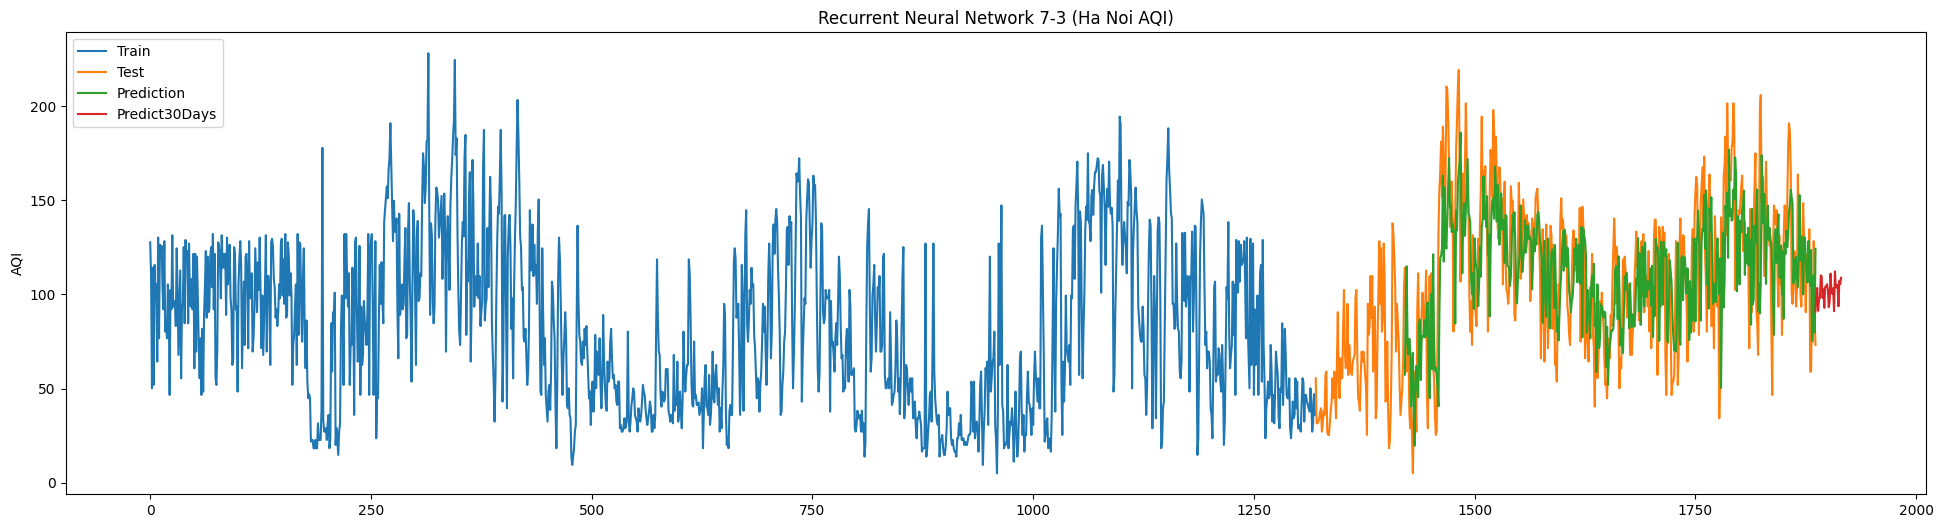

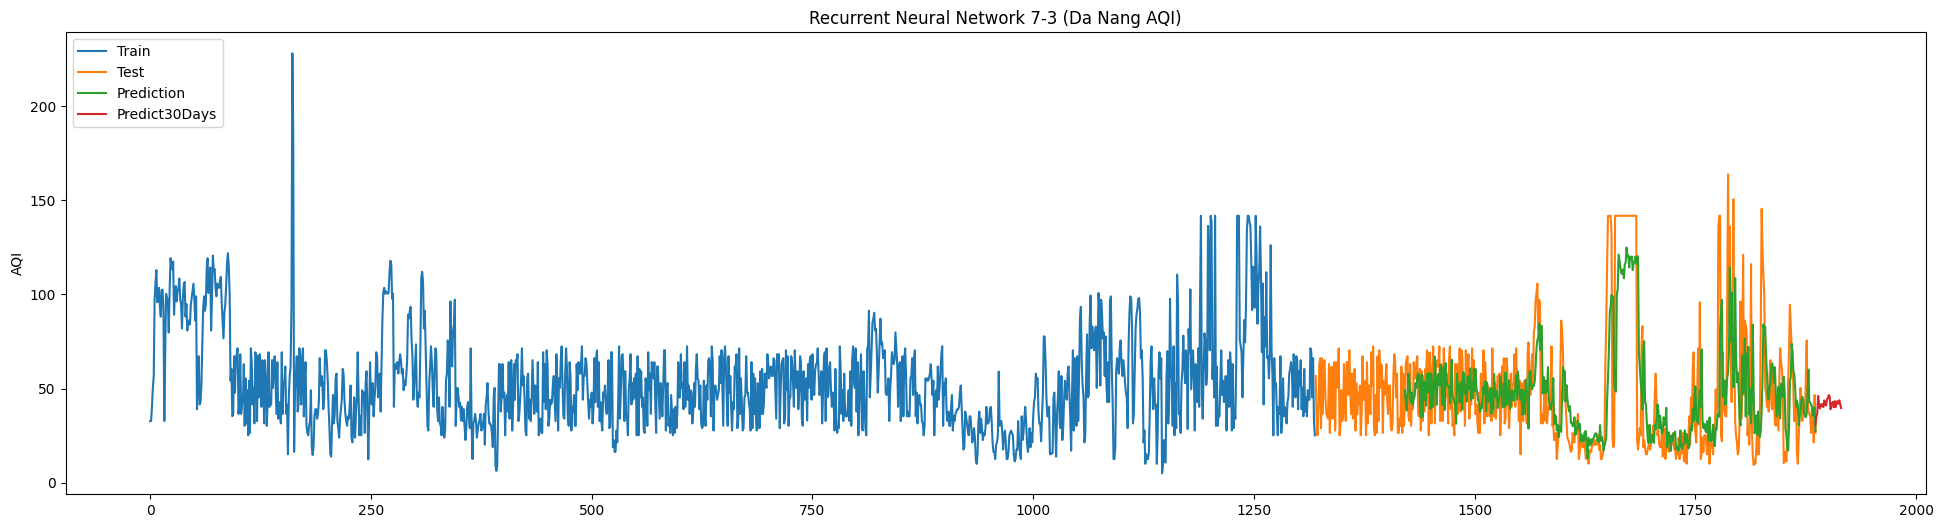

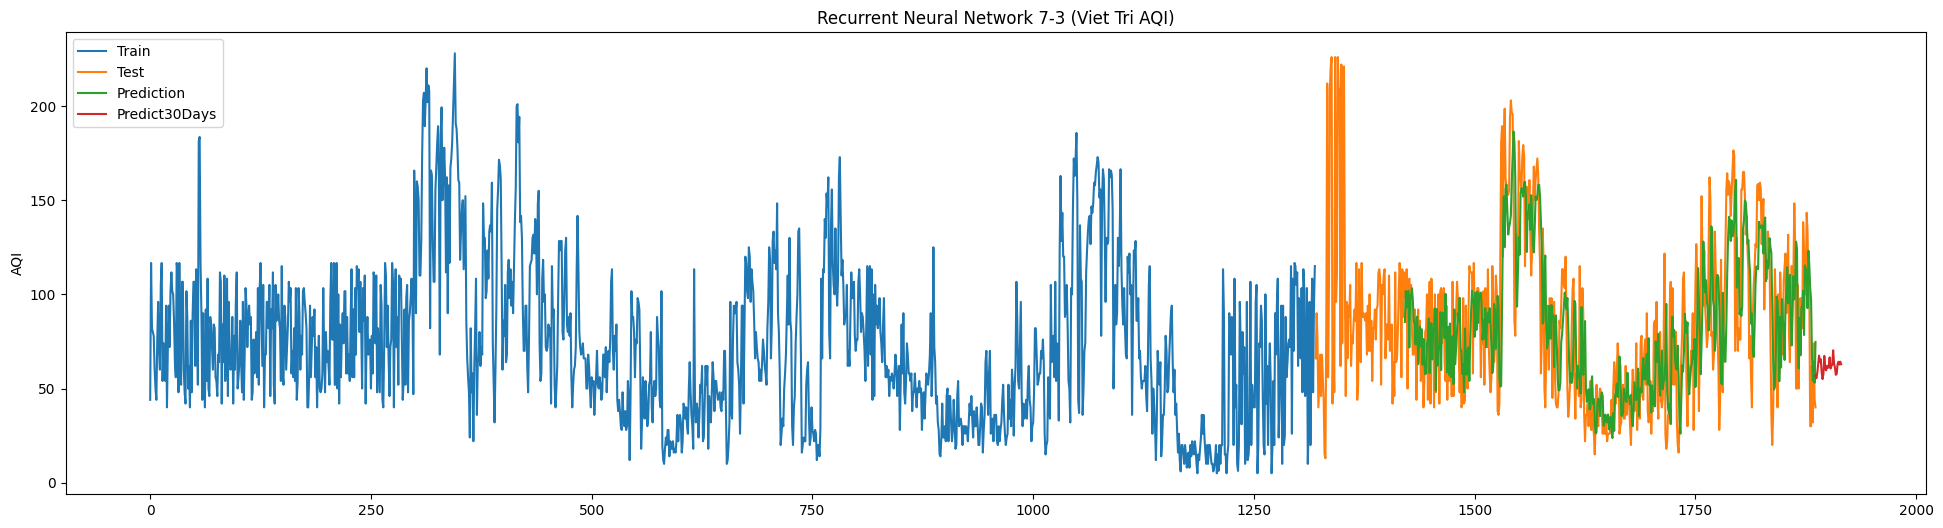

In [51]:
# Vẽ hình
plt.figure(figsize=(24, 6))
train_data_index_HN = pd.RangeIndex(start=0, stop=train_size_HN, step=1)
plt.plot(scaler.inverse_transform(train_data_HN))
test_data_index_HN = pd.RangeIndex(start=train_size_HN, stop=train_size_HN+test_size_HN, step=1)
plt.plot(test_data_index_HN,scaler.inverse_transform(test_data_HN))
test_data_index_HN = pd.RangeIndex(start=train_size_HN+101, stop=train_size_HN+test_size_HN, step=1)
plt.plot(test_data_index_HN,(y_pred_HN))
predict_data_index_HN = pd.RangeIndex(start=len(df_HN)-1, stop=len(df_HN)+29, step=1)
plt.plot(predict_data_index_HN,scaler.inverse_transform(lst_output_HN))
plt.title('Recurrent Neural Network 7-3 (Ha Noi AQI)')
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict30Days'], loc='upper left')
plt.show()

plt.figure(figsize=(24, 6))
train_data_index_DN = pd.RangeIndex(start=0, stop=train_size_DN, step=1)
plt.plot(scaler.inverse_transform(train_data_DN))
test_data_index_DN = pd.RangeIndex(start=train_size_DN, stop=train_size_DN+test_size_DN, step=1)
plt.plot(test_data_index_DN,scaler.inverse_transform(test_data_DN))
test_data_index_DN = pd.RangeIndex(start=train_size_DN+101, stop=train_size_DN+test_size_DN, step=1)
plt.plot(test_data_index_DN,(y_pred_DN))
predict_data_index_DN = pd.RangeIndex(start=len(df_DN)-1, stop=len(df_DN)+29, step=1)
plt.plot(predict_data_index_DN,scaler.inverse_transform(lst_output_DN))
plt.title('Recurrent Neural Network 7-3 (Da Nang AQI)')
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict30Days'], loc='upper left')
plt.show()

plt.figure(figsize=(24, 6))
train_data_index_VT = pd.RangeIndex(start=0, stop=train_size_VT, step=1)
plt.plot(scaler.inverse_transform(train_data_VT))
test_data_index_VT = pd.RangeIndex(start=train_size_VT, stop=train_size_VT+test_size_VT, step=1)
plt.plot(test_data_index_VT,scaler.inverse_transform(test_data_VT))
test_data_index_VT = pd.RangeIndex(start=train_size_VT+101, stop=train_size_VT+test_size_VT, step=1)
plt.plot(test_data_index_VT,(y_pred_VT))
predict_data_index_VT = pd.RangeIndex(start=len(df_VT)-1, stop=len(df_VT)+29, step=1)
plt.plot(predict_data_index_VT,scaler.inverse_transform(lst_output_VT))
plt.title('Recurrent Neural Network 7-3 (Viet Tri AQI)')
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict30Days'], loc='upper left')
plt.show()

In [52]:
# Chia dữ liệu train, test theo tỉ lệ 8:2

# Hà Nội
train_size_HN = int(0.8 * len(df_HN))
test_size_HN = len(df_HN) - train_size_HN

train_data_HN = df_HN[:train_size_HN]
test_data_HN = df_HN[train_size_HN:train_size_HN+test_size_HN]

# Đà Nẵng
train_size_DN = int(0.8 * len(df_DN))
test_size_DN = len(df_DN) - train_size_DN

train_data_DN = df_DN[:train_size_DN]
test_data_DN = df_DN[train_size_DN:train_size_DN+test_size_DN]

#Việt Trì
train_size_VT = int(0.8 * len(df_VT))
test_size_VT = len(df_VT) - train_size_VT

train_data_VT = df_VT[:train_size_VT]
test_data_VT = df_VT[train_size_VT:train_size_VT+test_size_VT]

In [53]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train_HN, y_train_HN = create_dataset(train_data_HN, time_step)
X_test_HN, y_test_HN = create_dataset(test_data_HN, time_step)

X_train_DN, y_train_DN = create_dataset(train_data_DN, time_step)
X_test_DN, y_test_DN = create_dataset(test_data_DN, time_step)

X_train_VT, y_train_VT = create_dataset(train_data_VT, time_step)
X_test_VT, y_test_VT = create_dataset(test_data_VT, time_step)

In [54]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train_HN = X_train_HN.reshape(X_train_HN.shape[0],X_train_HN.shape[1] , 1)
X_test_HN = X_test_HN.reshape(X_test_HN.shape[0],X_test_HN.shape[1] , 1)

X_train_DN = X_train_DN.reshape(X_train_DN.shape[0],X_train_DN.shape[1] , 1)
X_test_DN = X_test_DN.reshape(X_test_DN.shape[0],X_test_DN.shape[1] , 1)

X_train_VT = X_train_VT.reshape(X_train_VT.shape[0],X_train_VT.shape[1] , 1)
X_test_VT = X_test_VT.reshape(X_test_VT.shape[0],X_test_VT.shape[1] , 1)

In [55]:
# Define LSTM Model

model_HN = Sequential()
model_HN.add(SimpleRNN(50, input_shape=(time_step, 1)))
model_HN.add(Dense(1))
model_HN.compile(loss='mean_squared_error',optimizer='adam')

model_DN = Sequential()
model_DN.add(SimpleRNN(50, input_shape=(time_step, 1)))
model_DN.add(Dense(1))
model_DN.compile(loss='mean_squared_error',optimizer='adam')

model_VT = Sequential()
model_VT.add(SimpleRNN(50, input_shape=(time_step, 1)))
model_VT.add(Dense(1))
model_VT.compile(loss='mean_squared_error',optimizer='adam')

In [56]:
# Fit mô hình với dữ liệu train
model_HN.fit(X_train_HN,y_train_HN,validation_data=(X_test_HN,y_test_HN),epochs=100,batch_size=64,verbose=1)
model_DN.fit(X_train_DN,y_train_DN,validation_data=(X_test_DN,y_test_DN),epochs=100,batch_size=64,verbose=1)
model_VT.fit(X_train_VT,y_train_VT,validation_data=(X_test_VT,y_test_VT),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 3s 48ms/step - loss: 0.0684 - val_loss: 0.0313
Epoch 2/100
22/22 [==============================] - 0s 19ms/step - loss: 0.0297 - val_loss: 0.0256
Epoch 3/100
22/22 [==============================] - 0s 21ms/step - loss: 0.0251 - val_loss: 0.0230
Epoch 4/100
22/22 [==============================] - 0s 19ms/step - loss: 0.0225 - val_loss: 0.0214
Epoch 5/100
22/22 [==============================] - 0s 20ms/step - loss: 0.0209 - val_loss: 0.0199
Epoch 6/100
22/22 [==============================] - 0s 20ms/step - loss: 0.0195 - val_loss: 0.0197
Epoch 7/100
22/22 [==============================] - 0s 19ms/step - loss: 0.0184 - val_loss: 0.0180
Epoch 8/100
22/22 [==============================] - 0s 22ms/step - loss: 0.0174 - val_loss: 0.0196
Epoch 9/100
22/22 [==============================] - 0s 19ms/step - loss: 0.0169 - val_loss: 0.0167
Epoch 10/100
22/22 [==============================] - 0s 20ms/step - loss: 0.0161 - val_loss: 0.0172

In [57]:
# 10. Dự báo dữ liệu test
y_pred_HN=model_HN.predict(X_test_HN)
y_pred_DN=model_DN.predict(X_test_DN)
y_pred_VT=model_VT.predict(X_test_VT)

9/9 [==============================] - 0s 8ms/step


In [58]:
# Chuẩn hóa dữ liệu y_pred
y_pred_HN=scaler.inverse_transform(y_pred_HN)
y_pred_DN=scaler.inverse_transform(y_pred_DN)
y_pred_VT=scaler.inverse_transform(y_pred_VT)

In [59]:
# Dự báo 30 ngày tiếp theo

x_input_HN = test_data_HN[278:].reshape(1, -1)
x_input_DN = test_data_DN[278:].reshape(1, -1)
x_input_VT = test_data_VT[278:].reshape(1, -1)

temp_input_HN = list(x_input_HN[0])
temp_input_DN = list(x_input_DN[0])
temp_input_VT = list(x_input_VT[0])

lst_output_HN = []
lst_output_DN = []
lst_output_VT = []

n_steps = 100
i = 0

while i < 30:
    # Forecast for HN
    if len(temp_input_HN) > 100:
        x_input_HN = np.array(temp_input_HN[1:])
        x_input_HN = x_input_HN.reshape(1, -1)
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        temp_input_HN = temp_input_HN[1:]
        lst_output_HN.extend(yhat_HN.tolist())

    else:
        x_input_HN = x_input_HN.reshape((1, n_steps, 1))
        yhat_HN = model_HN.predict(x_input_HN, verbose=0)
        temp_input_HN.extend(yhat_HN[0].tolist())
        lst_output_HN.extend(yhat_HN.tolist())

    # Forecast for DN
    if len(temp_input_DN) > 100:
        x_input_DN = np.array(temp_input_DN[1:])
        x_input_DN = x_input_DN.reshape(1, -1)
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        temp_input_DN = temp_input_DN[1:]
        lst_output_DN.extend(yhat_DN.tolist())

    else:
        x_input_DN = x_input_DN.reshape((1, n_steps, 1))
        yhat_DN = model_DN.predict(x_input_DN, verbose=0)
        temp_input_DN.extend(yhat_DN[0].tolist())
        lst_output_DN.extend(yhat_DN.tolist())

    # Forecast for VT
    if len(temp_input_VT) > 100:
        x_input_VT = np.array(temp_input_VT[1:])
        x_input_VT = x_input_VT.reshape(1, -1)
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        temp_input_VT = temp_input_VT[1:]
        lst_output_VT.extend(yhat_VT.tolist())

    else:
        x_input_VT = x_input_VT.reshape((1, n_steps, 1))
        yhat_VT = model_VT.predict(x_input_VT, verbose=0)
        temp_input_VT.extend(yhat_VT[0].tolist())
        lst_output_VT.extend(yhat_VT.tolist())

    i += 1

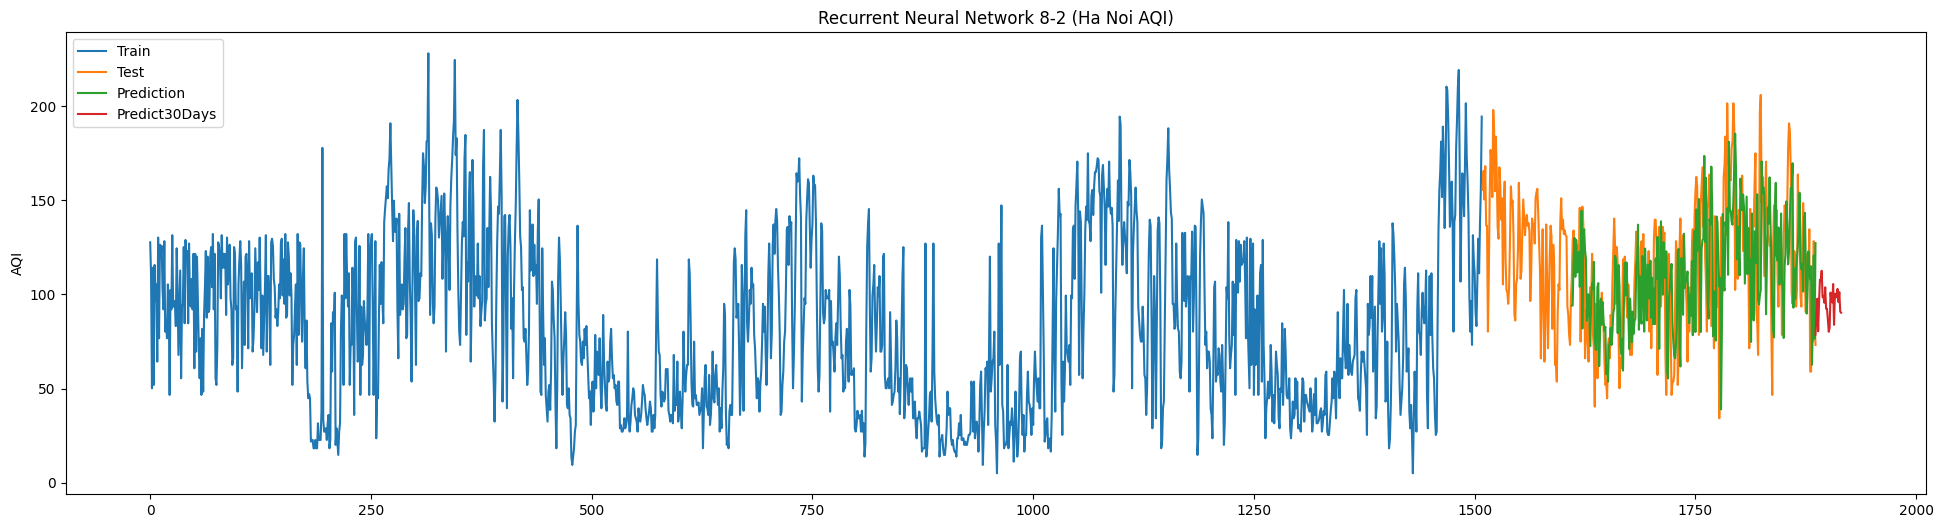

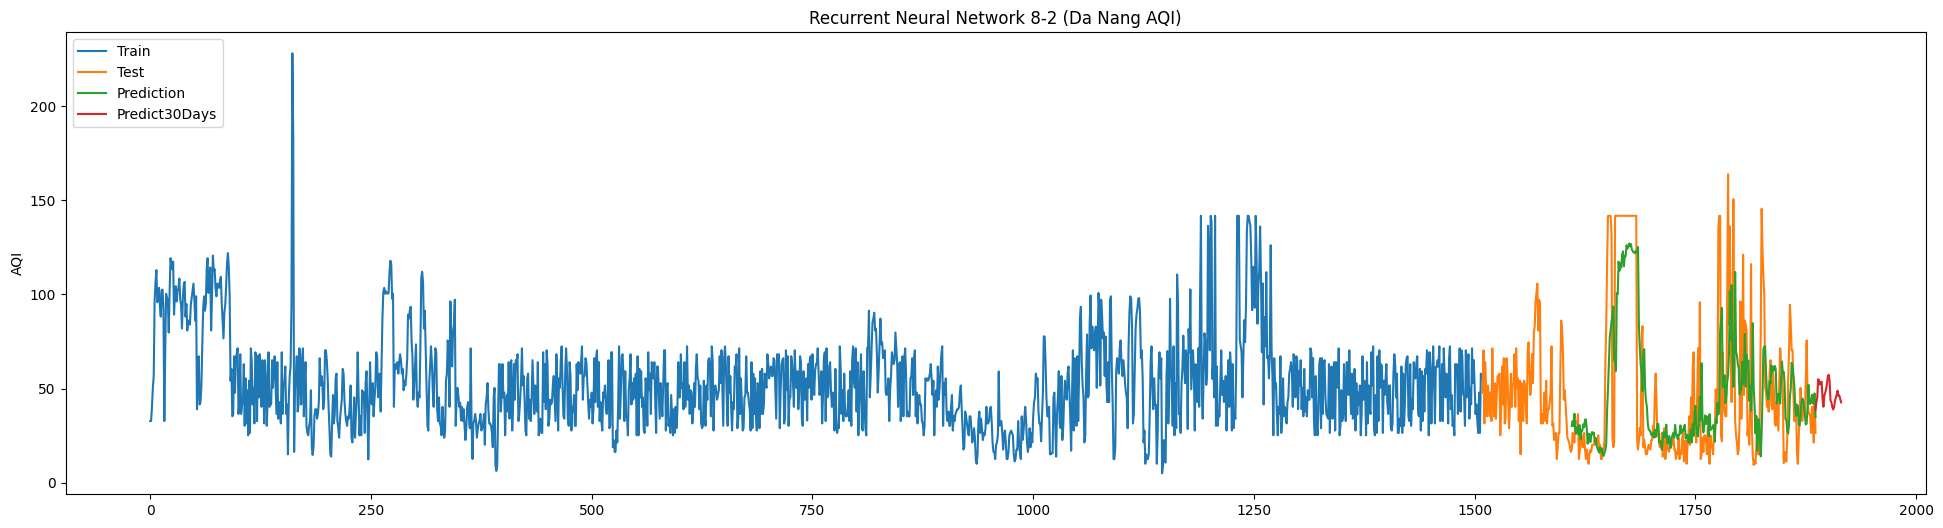

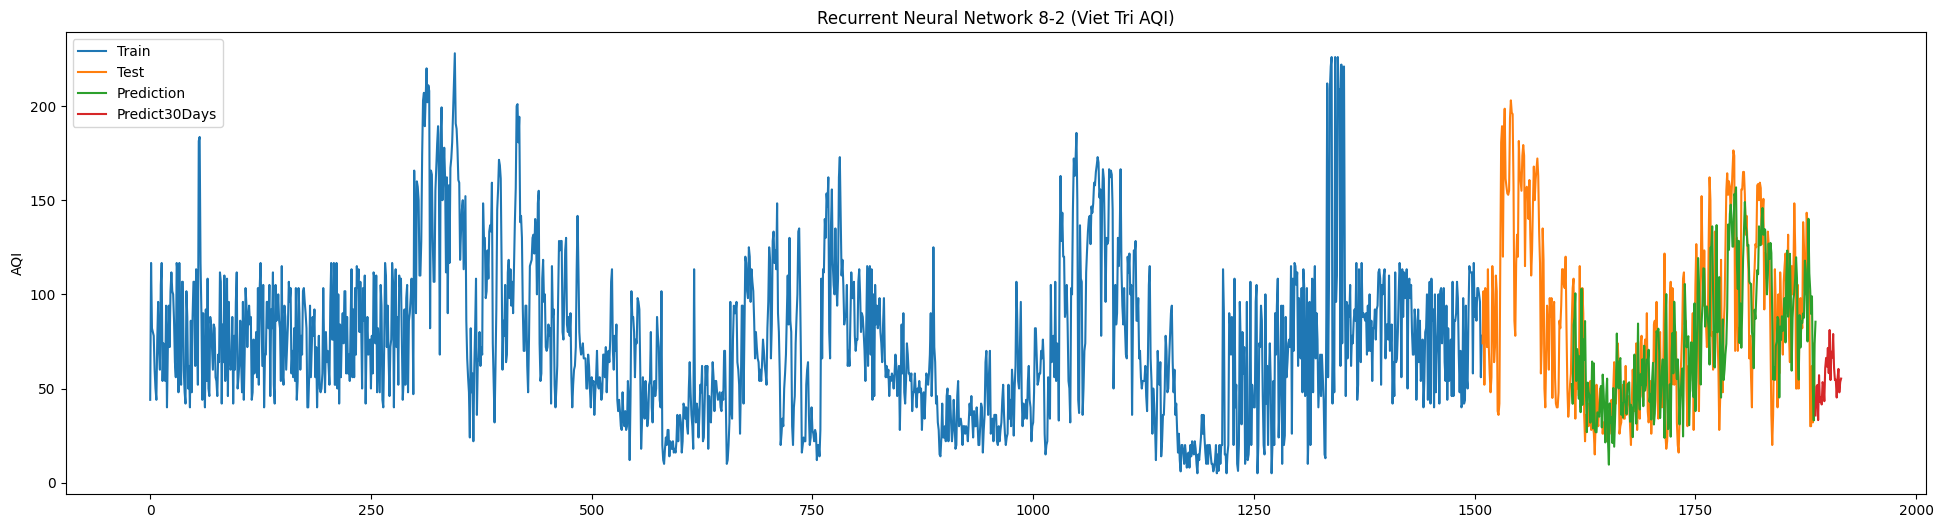

In [60]:
# Vẽ hình
plt.figure(figsize=(24, 6))
train_data_index_HN = pd.RangeIndex(start=0, stop=train_size_HN, step=1)
plt.plot(scaler.inverse_transform(train_data_HN))
test_data_index_HN = pd.RangeIndex(start=train_size_HN, stop=train_size_HN+test_size_HN, step=1)
plt.plot(test_data_index_HN,scaler.inverse_transform(test_data_HN))
test_data_index_HN = pd.RangeIndex(start=train_size_HN+101, stop=train_size_HN+test_size_HN, step=1)
plt.plot(test_data_index_HN,(y_pred_HN))
predict_data_index_HN = pd.RangeIndex(start=len(df_HN)-1, stop=len(df_HN)+29, step=1)
plt.plot(predict_data_index_HN,scaler.inverse_transform(lst_output_HN))
plt.title('Recurrent Neural Network 8-2 (Ha Noi AQI)')
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict30Days'], loc='upper left')
plt.show()

plt.figure(figsize=(24, 6))
train_data_index_DN = pd.RangeIndex(start=0, stop=train_size_DN, step=1)
plt.plot(scaler.inverse_transform(train_data_DN))
test_data_index_DN = pd.RangeIndex(start=train_size_DN, stop=train_size_DN+test_size_DN, step=1)
plt.plot(test_data_index_DN,scaler.inverse_transform(test_data_DN))
test_data_index_DN = pd.RangeIndex(start=train_size_DN+101, stop=train_size_DN+test_size_DN, step=1)
plt.plot(test_data_index_DN,(y_pred_DN))
predict_data_index_DN = pd.RangeIndex(start=len(df_DN)-1, stop=len(df_DN)+29, step=1)
plt.plot(predict_data_index_DN,scaler.inverse_transform(lst_output_DN))
plt.title('Recurrent Neural Network 8-2 (Da Nang AQI)')
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict30Days'], loc='upper left')
plt.show()

plt.figure(figsize=(24, 6))
train_data_index_VT = pd.RangeIndex(start=0, stop=train_size_VT, step=1)
plt.plot(scaler.inverse_transform(train_data_VT))
test_data_index_VT = pd.RangeIndex(start=train_size_VT, stop=train_size_VT+test_size_VT, step=1)
plt.plot(test_data_index_VT,scaler.inverse_transform(test_data_VT))
test_data_index_VT = pd.RangeIndex(start=train_size_VT+101, stop=train_size_VT+test_size_VT, step=1)
plt.plot(test_data_index_VT,(y_pred_VT))
predict_data_index_VT = pd.RangeIndex(start=len(df_VT)-1, stop=len(df_VT)+29, step=1)
plt.plot(predict_data_index_VT,scaler.inverse_transform(lst_output_VT))
plt.title('Recurrent Neural Network 8-2 (Viet Tri AQI)')
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict30Days'], loc='upper left')
plt.show()